In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la

import matplotlib.pyplot as plt
%matplotlib inline

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
#generate the dataset
N=1000
x1=np.random.normal(loc=0, scale= 1, size=N)
x2=x1+np.random.normal(loc=0, scale= 3, size=N)
x3=2*x1+x2
df=pd.DataFrame({"x1": x1, "x2": x2, "x3": x3})

#find the eigenvectors and the eigenvalues of the covariance matrix of the dataset
Cov=np.cov(df.T) #Covariance matrix: we want it to be 3x3
l, V= la.eig(Cov) 
eig=np.sort(np.real_if_close(l)) #Sorting and chosing real eigenvalues
print("Eigevalues (sorted): \n",eig)
print("eigenvectors: \n", V)


#Find the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = np.linalg.svd(Cov)

l_svd = spectrum
V_svd = U
print("\n")
print("With SVD:")
eig_svd=np.sort(np.real_if_close(l_svd))
print("Eigenvalues (sorted): \n",eig_svd) #Sorting and chosing real eigenvalues
print("Eigenvectors: \n",V_svd)
print("\n")
print("Are the eigenvalues matching ?", np.allclose(eig,eig_svd))


#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? 
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
print("\nPercent of the total datast's variability explained by PCA:")
Lambda=np.diag(l)
print (np.real_if_close((Lambda[0,0])/Lambda.trace()))

Eigevalues (sorted): 
 [1.30417415e-15 2.10346558e+00 2.53993387e+01]
eigenvectors: 
 [[-0.11379476 -0.81649658  0.56602481]
 [-0.57944122 -0.40824829 -0.70539436]
 [-0.80703075  0.40824829  0.42665526]]


With SVD:
Eigenvalues (sorted): 
 [5.36349664e-16 2.10346558e+00 2.53993387e+01]
Eigenvectors: 
 [[-0.11379476  0.56602481 -0.81649658]
 [-0.57944122 -0.70539436 -0.40824829]
 [-0.80703075  0.42665526  0.40824829]]


Are the eigenvalues matching ? True

Percent of the total datast's variability explained by PCA:
0.9235181418448849


In [3]:
#Redefine the data in the basis yielded by the PCA procedure
#eig=V[0,:] #eigenvalue corresponding to the PCA
#df_newc=pd.DataFrame(np.real_if_close(np.dot(V.T,df.T))) #We progect on PC
#df_newc

X=df.T
# rotate all the data points accordingly to the new base
Xp = pd.DataFrame(np.dot(V.T, X))

Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.

In [4]:
def scatter_PCA(ax1,ax2,X):
    """
    X: our dataframe
    ax1,ax2: axis between which we want to see the projected PCA
    """
    scale_factor=3
    Cov=np.cov(X.T)
    l0, V0= la.eig(Cov) 
    l0=np.real_if_close(l0)
#    plt.figure(figsize=(10,10))
    ax.scatter(X.iloc[:,ax1], X.iloc[:,ax2], alpha=0.2)
    for li, vi in zip(l0, V0.T):
        plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
        plt.axis([-3,3,-3,3]);

(-10.0, 10.0)

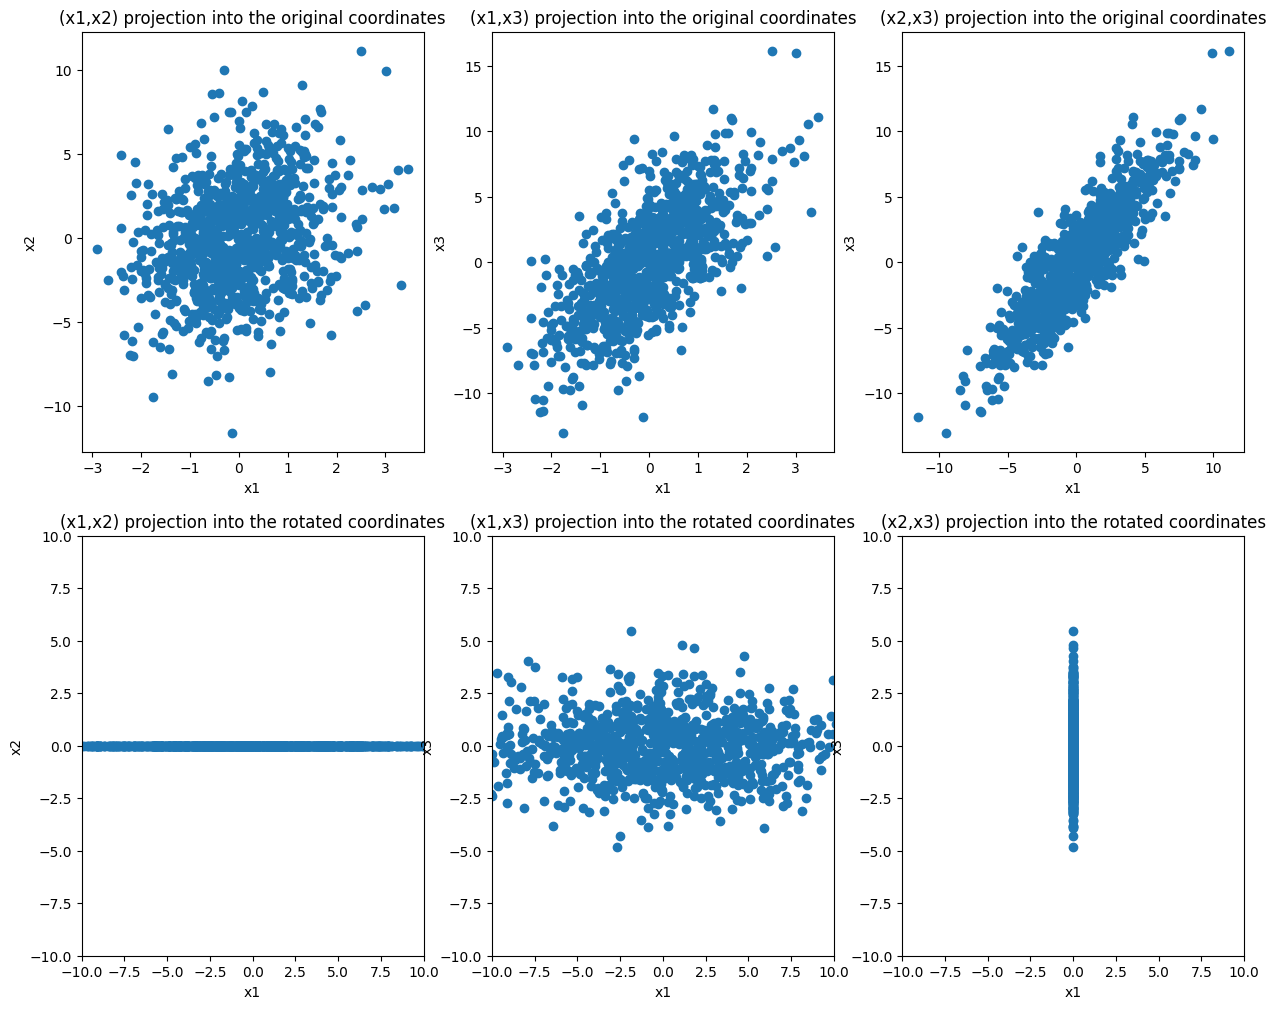

In [5]:
#Jonathan version !!!

X=df.T
l,V=la.eig(np.cov(X))
l=np.real_if_close(l)
Xp=np.dot(V.T,X)

# a scale factor to emphazise the lines 
scale_factor=0.5
fig, axes=plt.subplots(2,3,figsize=(15,12))

#Do for loop if you want
#Nonrotated coordinate
axes[0,0].scatter(X.iloc[0,:],X.iloc[1,:])
axes[0,0].set_xlabel("x1")
axes[0,0].set_ylabel("x2")
axes[0,0].set_title("(x1,x2) projection into the original coordinates")

axes[0,1].scatter(X.iloc[0,:],X.iloc[2,:])
axes[0,1].set_xlabel("x1")
axes[0,1].set_ylabel("x3")
axes[0,1].set_title("(x1,x3) projection into the original coordinates")

axes[0,2].scatter(X.iloc[1,:],X.iloc[2,:])
axes[0,2].set_xlabel("x1")
axes[0,2].set_ylabel("x3")
axes[0,2].set_title("(x2,x3) projection into the original coordinates")

#Rotated coordinates
axes[1,0].scatter(Xp[0,:],Xp[1,:])
axes[1,0].set_xlabel("x1")
axes[1,0].set_ylabel("x2")
axes[1,0].set_title("(x1,x2) projection into the rotated coordinates")
axes[1,0].set_xlim(-10,10)
axes[1,0].set_ylim(-10,10)

axes[1,1].scatter(Xp[0,:],Xp[2,:])
axes[1,1].set_xlabel("x1")
axes[1,1].set_ylabel("x3")
axes[1,1].set_title("(x1,x3) projection into the rotated coordinates")
axes[1,1].set_xlim(-10,10)
axes[1,1].set_ylim(-10,10)

axes[1,2].scatter(Xp[1,:],Xp[2,:])
axes[1,2].set_xlabel("x1")
axes[1,2].set_ylabel("x3")
axes[1,2].set_title("(x2,x3) projection into the rotated coordinates")
axes[1,2].set_xlim(-10,10)
axes[1,2].set_ylim(-10,10)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

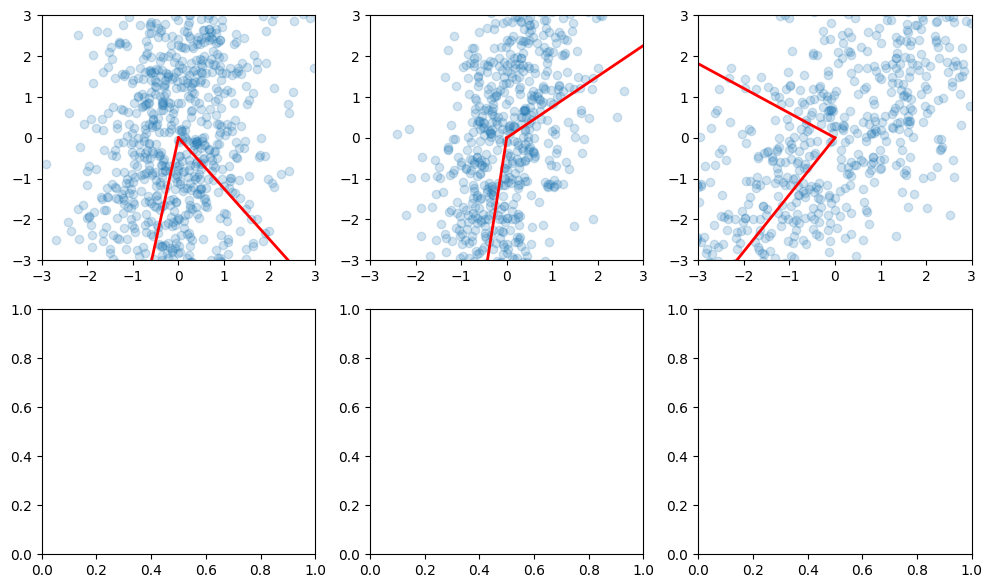

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

# Flatten the 2D array of axes to individual variables
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
#fig, ax1 = plt.subplots(figsize=(10, 10))
"""
    X: our dataframe
    ax1,ax2: axis between which we want to see the projected PCA
"""

#Original coordinates
ii = 0
X = df
for cmp1, cmp2 in zip([0, 0, 1], [1, 2, 2]): #Component to visualize the plot
    ax1 = axes.flatten()[ii]
    ii += 1
    scale_factor = 3
    Cov = np.cov(X.T)
    l0, V0 = la.eig(Cov) 
    l0 = np.real_if_close(l0)
    
    # Scatter plot
    ax1.scatter(X.iloc[:, cmp1], X.iloc[:, cmp2], alpha=0.2)
    
    # Plot eigenvectors
    for li, vi in zip(l0, V0.T):
        ax1.plot([0, scale_factor * li * vi[cmp1]], 
                 [0, scale_factor * li * vi[cmp2]], 
                 'r-', lw=2)
    ax1.axis([-3, 3, -3, 3])

#New coordinates
X=Xp.T
for cmp1, cmp2 in zip([0, 0, 1], [1, 2, 2]): #Component to visualize the plot
    ax1 = axes.flatten()[ii]
    ii += 1
    scale_factor = 3
    Cov = np.cov(X.T)
    l0, V0 = la.eig(Cov) 
    l0 = np.real_if_close(l0)
    
    # Scatter plot
    ax1.scatter(X.iloc[:, cmp1], X.iloc[:, cmp2], alpha=0.2)
    
    # Plot eigenvectors
    for li, vi in zip(l0, V0.T):
        ax1.plot([0, scale_factor * li * vi[cmp1]], 
                 [0, scale_factor * li * vi[cmp2]], 
                 'r-', lw=2)
    ax1.axis([-3, 3, -3, 3])


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [7]:
noise = [] #list of noisy channels (dimenions)

for i in np.arange(5):
    noise.append(np.random.normal(loc=0, scale= 1/50, size=N))
    df["noise"+str(i)]= noise[i]

df.head()

,x1,x2,x3,noise0,noise1,noise2,noise3,noise4
0,2.402400,0.837307,5.642106,-0.004602,0.001969,-0.007344,0.008193,-0.033107
1,-0.725411,0.216854,-1.233969,0.028175,-0.001989,-0.040030,-0.017996,-0.008100
2,-1.111758,3.491098,1.267583,-0.025105,-0.016735,-0.026733,0.005392,0.022310
3,-0.812768,-3.671076,-5.296612,0.016741,-0.024349,0.001045,0.009560,0.005668
4,-0.079395,-2.688343,-2.847134,0.004140,-0.000290,-0.043749,-0.017505,0.029292


(-10.0, 10.0)

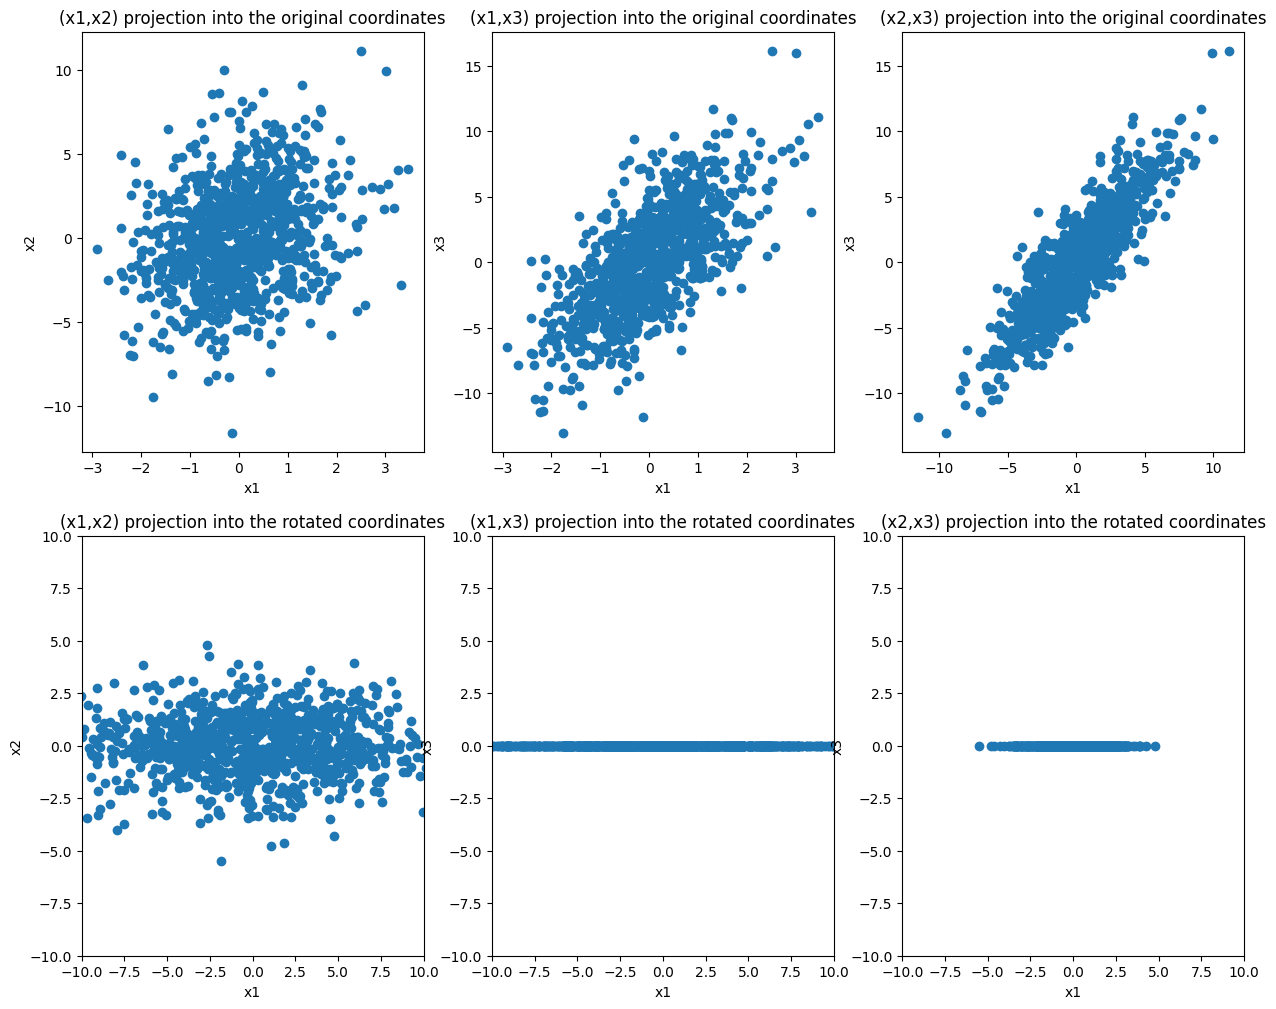

In [8]:
#Jonathan's method
X=df.T
l,V =la.eig(np.cov(X))
Xp=np.dot(V.T,X)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))

#Nonrotated coordinate
axes[0,0].scatter(X.iloc[0,:],X.iloc[1,:])
axes[0,0].set_xlabel("x1")
axes[0,0].set_ylabel("x2")
axes[0,0].set_title("(x1,x2) projection into the original coordinates")

axes[0,1].scatter(X.iloc[0,:],X.iloc[2,:])
axes[0,1].set_xlabel("x1")
axes[0,1].set_ylabel("x3")
axes[0,1].set_title("(x1,x3) projection into the original coordinates")

axes[0,2].scatter(X.iloc[1,:],X.iloc[2,:])
axes[0,2].set_xlabel("x1")
axes[0,2].set_ylabel("x3")
axes[0,2].set_title("(x2,x3) projection into the original coordinates")

#Rotated coordinates
axes[1,0].scatter(Xp[0,:],Xp[1,:])
axes[1,0].set_xlabel("x1")
axes[1,0].set_ylabel("x2")
axes[1,0].set_title("(x1,x2) projection into the rotated coordinates")
axes[1,0].set_xlim(-10,10)
axes[1,0].set_ylim(-10,10)

axes[1,1].scatter(Xp[0,:],Xp[2,:])
axes[1,1].set_xlabel("x1")
axes[1,1].set_ylabel("x3")
axes[1,1].set_title("(x1,x3) projection into the rotated coordinates")
axes[1,1].set_xlim(-10,10)
axes[1,1].set_ylim(-10,10)

axes[1,2].scatter(Xp[1,:],Xp[2,:])
axes[1,2].set_xlabel("x1")
axes[1,2].set_ylabel("x3")
axes[1,2].set_title("(x2,x3) projection into the rotated coordinates")
axes[1,2].set_xlim(-10,10)
axes[1,2].set_ylim(-10,10)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

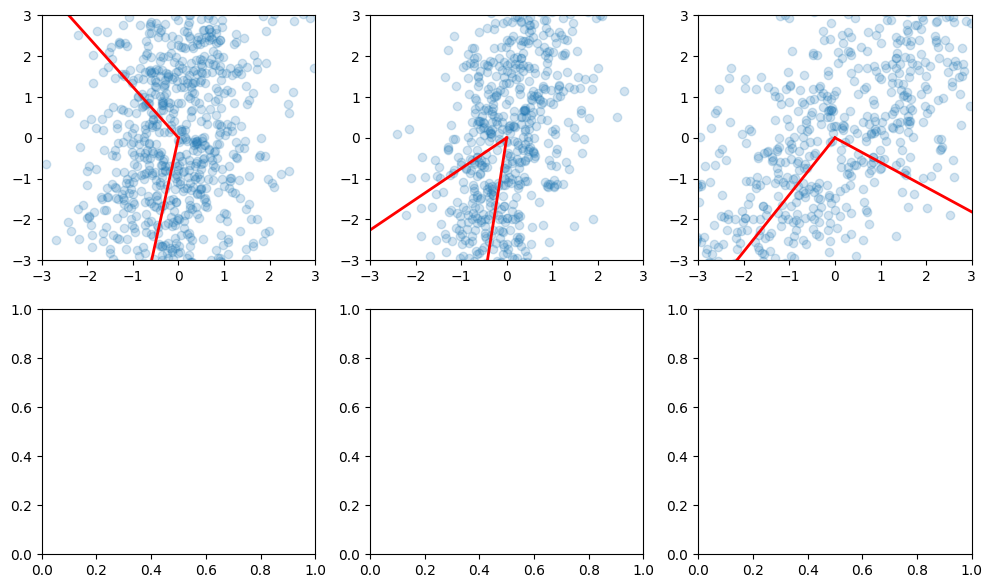

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

# Flatten the 2D array of axes to individual variables
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
#fig, ax1 = plt.subplots(figsize=(10, 10))
"""
    X: our dataframe
    ax1,ax2: axis between which we want to see the projected PCA
"""

#Original coordinates
ii = 0
X = df
for cmp1, cmp2 in zip([0, 0, 1], [1, 2, 2]): #Component to visualize the plot
    ax1 = axes.flatten()[ii]
    ii += 1
    scale_factor = 3
    Cov = np.cov(X.T)
    l0, V0 = la.eig(Cov) 
    l0 = np.real_if_close(l0)
    
    # Scatter plot
    ax1.scatter(X.iloc[:, cmp1], X.iloc[:, cmp2], alpha=0.2)
    
    # Plot eigenvectors
    for li, vi in zip(l0, V0.T):
        ax1.plot([0, scale_factor * li * vi[cmp1]], 
                 [0, scale_factor * li * vi[cmp2]], 
                 'r-', lw=2)
    ax1.axis([-3, 3, -3, 3])

#New coordinates
X=Xp.T
for cmp1, cmp2 in zip([0, 0, 1], [1, 2, 2]): #Component to visualize the plot
    ax1 = axes.flatten()[ii]
    ii += 1
    scale_factor = 3
    Cov = np.cov(X.T)
    l0, V0 = la.eig(Cov) 
    l0 = np.real_if_close(l0)
    
    # Scatter plot
    ax1.scatter(X.iloc[:, cmp1], X.iloc[:, cmp2], alpha=0.2)
    
    # Plot eigenvectors
    for li, vi in zip(l0, V0.T):
        ax1.plot([0, scale_factor * li * vi[cmp1]], 
                 [0, scale_factor * li * vi[cmp2]], 
                 'r-', lw=2)
    ax1.axis([-3, 3, -3, 3])


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [10]:
# get the dataset and its description on the proper data directory
import os
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

#create the directory
# Step 1: Create the 'data' folder if it doesn't exist
os.makedirs('data', exist_ok=True)

#Step 2: Install locally instead than home directory:
import os

# Step 1: Create the 'data' folder if it doesn't exist
os.makedirs('data', exist_ok=True)

# Step 2: Use wget to download the file into the 'data' folder
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -O ./data/magic04.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -O ./data/magic04.names

--2025-01-15 19:39:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: «./data/magic04.data»

./data/magic04.data     [     <=>            ]   1,41M  1,12MB/s    in 1,3s    

2025-01-15 19:39:39 (1,12 MB/s) - «./data/magic04.data» salvato [1477391]

--2025-01-15 19:39:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: «./data/magic04.names»

./data/magic04.name     [ <=>                ]   5,27K  --.-KB/s  

In [11]:
df=pd.read_csv("data/magic04.data")

#clean the dataset (the last column is not numerical)
df=df.iloc[:,:-1]
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098


In [12]:
Cov=np.cov(X)
l, V= la.eig(Cov) 
l=np.real_if_close(l)

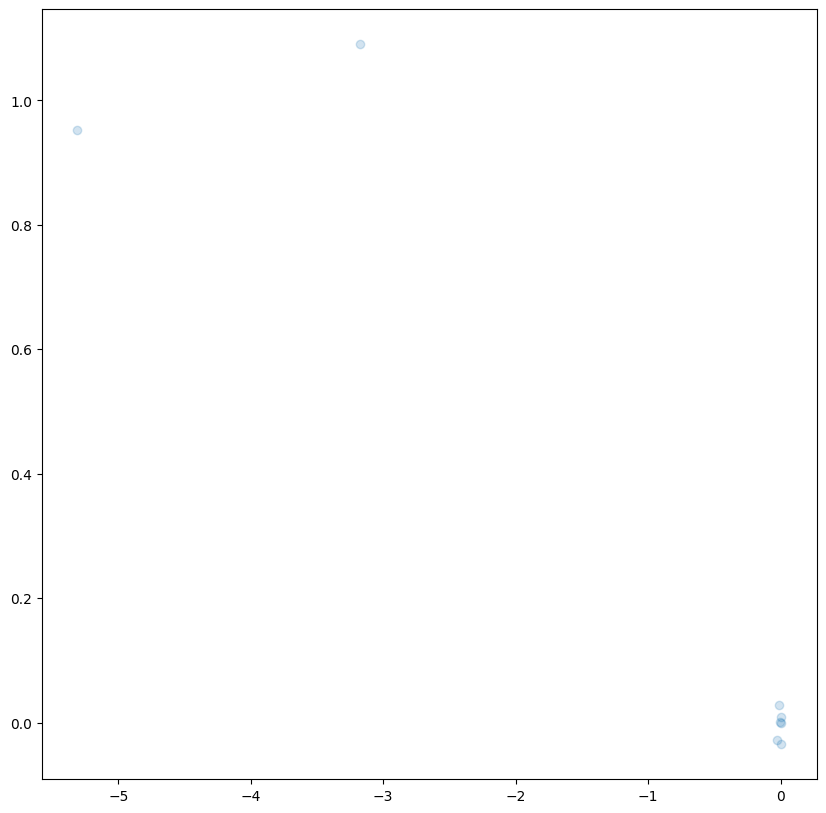

In [18]:
scale_factor=0.001

plt.figure(figsize=(10,10))
plt.scatter(X[0,:], X[1,:], alpha=0.2)
#for li, vi in zip(l0, V0.T):
#    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)